In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


[1.4444444444444442, 9.136012056639652]
40.95080611742304
3037


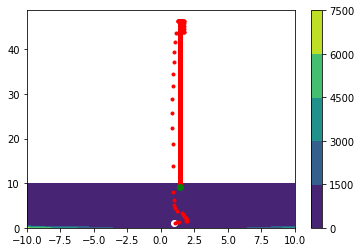

In [2]:
from numpy.core.fromnumeric import resize
X=[-1,3,5,-2,0,4,1,6,-3]
N=len(X)


func = lambda th: N*np.log(2*np.pi*th[1])+ sum((X-th[0])**2)/(2*th[1])

#Representamos la función
_x =np.linspace(-10,10, 100)
_y =np.linspace(0,10, 100)
_z=np.zeros((100,100))

for ix, x in enumerate(_x):
  for iy, y in enumerate(_y):
    _z[iy,ix]=func([x,y])

plt.contourf(_x,_y,_z,4)
plt.colorbar()


#Algorimo AdaMax

Theta = [1,1]
Thetaold=[0,0]
lr=0.1
b1= 0.9
b2=0.999
k=1
E=10**(-8)
plt.plot(Theta[0],Theta[1], "o", c = "white")
grad=np.zeros(2)
m=[0,0]
v=[0,0]
vv=np.zeros(2)
U=np.zeros(2)
M=np.zeros(2)
contador= 0
diferencia=1
XX=[0,0,0,0,0,0,0,0,0]
XXX=[0,0,0,0,0,0,0,0,0]
for _ in range(10000):
   
  if diferencia < 10**-5:
    break
  else:
    for it, th in enumerate(X):
      XX[it]=X[it]-Theta[0]
      XXX[it]=(X[it]-Theta[0])**2
    grad[0] = -sum(XX)/Theta[1]
    grad[1]= N/(2*Theta[1])-sum(XXX)/(2*Theta[1]**2)
    #print(grad)

    for it, th in enumerate(Theta):
        vv[it]=v[it]
        m[it]= b1*m[it] + (1-b1)* grad[it]
        v[it]= b2*v[it] + (1-b2)* grad[it]**2
    
    b1k= b1**(k)
    b2k= b2**(k)
    k=k+1

    for it, th in enumerate(Theta):

      M[it]= m[it]/(1-b1k)
    
      if b2*vv[0] < abs(grad[0]):
        U[it]=abs(grad[it])
      else:
        U[it]=b2*vv[it]
    
    for it, th in enumerate(Theta):  

      Thetaold[it]=Theta[it]
      Theta[it] = Theta[it] - lr * M[it]/ U[it]
    plt.plot(Theta[0],Theta[1], ".", c = "red")

    diferencia=np.sqrt((Thetaold[0]-Theta[0])**2+(Thetaold[1]-Theta[1])**2)
      #print(diferencia)
    contador=contador+1

print(Theta)
print(func(Theta))
print(contador)
plt.plot(Theta[0],Theta[1], "o", c = "green")

plt.show()